<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# The Bank Marketing Campaign (EDA)

- **Objective:** Exploration and understanding the dataset by loading the data in a pandas dataframe format for efficient handeling.

### Authors: Abdullah Al-Qithmi
---



## Dataset information

#### This study considers real data collected from direct telemarketing campaigns of **Portuguese retail bank**
* The dataset consisted of **41,188** customer data
* It was collected from  **May 2008** to **June 2013**
* Often, **more than one contact** to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
* Both **Inbound** & **Outbound marketing** techniques were used during the campaigns
    * Inbound Telemarketing: a customer calls in to the cell center.
    * Outbound telemarketing: call-centers call potential customers directly.



#### The dataset encompasses 3 main groups of features:
* **Demographic Information** — age, job, marital, education, default, housing, & loan
* **Time Characteristics of the Call** — day, month, & duration
* **Characteristics of the Campaign** — contact, campaign, pdays, previous, & poutcome

The dataset can be downloaded from <a href="http://mlr.cs.umass.edu/ml/datasets/Bank+Marketing"><b>Here</b></a>

---

### EDA Approach
- Exploring the data will be done mathematically first, and then we will go through visualize the data to produce more concrete results and observations

#### Import The Required Packages & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from fancyimpute import KNN 
%matplotlib inline

Using TensorFlow backend.


In [2]:
ds = pd.read_csv('Data/bank-additional-full.csv', sep=';')

---
### Data Dictionary

In [3]:
#creating a dataframe that contains the dataset attributes names, description, and type
df = pd.DataFrame({
"Attribute Name": ["Age", "Job", "Marital", "Education", "Default", "Housing", "Loan", "Contact", "Month", "Day of Week", "Duration", "Campaign", "Pdays", "Previous", "Poutcome", "Emp.var.rate", "Cos.price.idx", "Cons.conf.idx", "Euribor3m", "Nr.employed", "y"],
"Description": ["It is age of client", "It is type of client’s job.",
"It is client’s marital status.", "What is the highest education of client?", "Does client has credit?", "Does client has housing loan?", "Does client has personal loan?",
"What is a contact communication type of client?",
"Last month of the year contracting to the client",
"Last day of the week contracting to the client?", "How long does it contact to the client?", "Number of contacts performed during campaign", "Number of days passed after last contacted", "Number of contacts performed before campaign",
"Outcome of the previous marketing campaign", "Employment variation rate",
"Consumer price index", "Consumer confidence index", "Euribor 3 month rate", "Number of employees", "Does the client has subscribed a term deposit?"],
"Type": ["Numeric", "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Numeric", "Numeric", "Numeric", "Numeric", "Categorical", "Numeric", "Numeric", "Numeric", "Numeric", "Numeric", "Categorical"],
                  })

df.style.set_properties(**{'text-align': 'left'})

,Attribute Name,Description,Type
0,Age,It is age of client,Numeric
1,Job,It is type of client’s job.,Categorical
2,Marital,It is client’s marital status.,Categorical
3,Education,What is the highest education of client?,Categorical
4,Default,Does client has credit?,Categorical
5,Housing,Does client has housing loan?,Categorical
6,Loan,Does client has personal loan?,Categorical
7,Contact,What is a contact communication type of client?,Categorical
8,Month,Last month of the year contracting to the client,Categorical
9,Day of Week,Last day of the week contracting to the client?,Categorical


In [4]:
#check the dataset shape
ds.shape

(41188, 21)

In [5]:
# see some of the attributes values 'first five rows'
ds.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# see some of the attributes values 'last five rows'
ds.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
ds.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

- - -
#### Exploring The Missing Values
* Null Values
* Zero Values
* Specific labels for missing values (Ex; Unknown, N/A, 999)

In [9]:
#check Null Values
print(ds.isnull().any())

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool


In [10]:
#Checking for zero values in numeric attributes
print("The original dataset:",ds.shape)
nullage= (ds['age']==0)
print(nullage.value_counts())
print('\n')
nullage= (ds['duration']==0)
print(nullage.value_counts())
print('\n')
nullage= (ds['campaign']==0)
print(nullage.value_counts())
print('\n')
nullage= (ds['pdays']==0)
print(nullage.value_counts())
print('\n')
nullage= (ds['previous']==0)
print(nullage.value_counts())
print('\n')
nullage= (ds['poutcome']==0)
print(nullage.value_counts())
print('\n')
nullage= (ds['emp.var.rate']==0)
print(nullage.value_counts())
print('\n')
nullage= (ds['cons.price.idx']==0)
print(nullage.value_counts())
print('\n')
nullage= (ds['cons.conf.idx']==0)
print(nullage.value_counts())
print('\n')
nullage= (ds['euribor3m']==0)
print(nullage.value_counts())
print('\n')
nullage= (ds['nr.employed']==0)
print(nullage.value_counts())

The original dataset: (41188, 21)
False    41188
Name: age, dtype: int64


False    41184
True         4
Name: duration, dtype: int64


False    41188
Name: campaign, dtype: int64


False    41173
True        15
Name: pdays, dtype: int64


True     35563
False     5625
Name: previous, dtype: int64


False    41188
Name: poutcome, dtype: int64


False    41188
Name: emp.var.rate, dtype: int64


False    41188
Name: cons.price.idx, dtype: int64


False    41188
Name: cons.conf.idx, dtype: int64


False    41188
Name: euribor3m, dtype: int64


False    41188
Name: nr.employed, dtype: int64


In [11]:
#create a function that is used to check the values of the attributes
def get_unique(col):
    print("\nCOLUMN:",col)
    print("COUNT UNIQUE VALUES:",len(ds[col].unique()))
    print("UNIQUE VALUES:",ds[col].value_counts())
    count_unknown = len(ds[ds[col]=='unknown'])/ds[col].count()*100
    print('Count of Unknown: ', count_unknown)

In [12]:
#check the the values of the numeric attributes
for col in ds.columns:
    if ds[col].dtype != object:
        get_unique(col)


COLUMN: age
COUNT UNIQUE VALUES: 78
UNIQUE VALUES: 31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
Count of Unknown:  0.0

COLUMN: duration
COUNT UNIQUE VALUES: 1544
UNIQUE VALUES: 85      170
90      170
136     168
73      167
124     164
87      162
72      161
104     161
111     160
106     159
109     158
97      158
122     157
135

/Users/AL-GoThMi1/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [13]:
#check the the values of the object attributes (Ex; Unknown, N/A, 999)
for col in ds.columns:
    if ds[col].dtype == object:
        get_unique(col)


COLUMN: job
COUNT UNIQUE VALUES: 12
UNIQUE VALUES: admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Count of Unknown:  0.8012042342429834

COLUMN: marital
COUNT UNIQUE VALUES: 4
UNIQUE VALUES: married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Count of Unknown:  0.1942313295134505

COLUMN: education
COUNT UNIQUE VALUES: 8
UNIQUE VALUES: university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
Count of Unknown:  4.202680392347285

COLUMN: default
COUNT UNIQUE VALUES: 3
UNIQUE VALUES: no    

In [14]:
#Check the Percentage of Unknown values in each columns:
for col in ds.columns:
    if ds[col].dtype == object:
        count_unknown=((ds[col]=='unknown').value_counts()/ds[col].count()*100)
        #count_unknown= ds[col].value_counts(normalize = True)
        print("\nCOLUMN:",col)
        print('The Percentage of Unknown: \n', count_unknown)


COLUMN: job
The Percentage of Unknown: 
 False    99.198796
True      0.801204
Name: job, dtype: float64

COLUMN: marital
The Percentage of Unknown: 
 False    99.805769
True      0.194231
Name: marital, dtype: float64

COLUMN: education
The Percentage of Unknown: 
 False    95.79732
True      4.20268
Name: education, dtype: float64

COLUMN: default
The Percentage of Unknown: 
 False    79.127416
True     20.872584
Name: default, dtype: float64

COLUMN: housing
The Percentage of Unknown: 
 False    97.596387
True      2.403613
Name: housing, dtype: float64

COLUMN: loan
The Percentage of Unknown: 
 False    97.596387
True      2.403613
Name: loan, dtype: float64

COLUMN: contact
The Percentage of Unknown: 
 False    100.0
Name: contact, dtype: float64

COLUMN: month
The Percentage of Unknown: 
 False    100.0
Name: month, dtype: float64

COLUMN: day_of_week
The Percentage of Unknown: 
 False    100.0
Name: day_of_week, dtype: float64

COLUMN: poutcome
The Percentage of Unknown: 
 Fals

In [15]:
#check the % of 999 value in the pdays attribute
(ds['pdays']==999).value_counts()/ds['pdays'].count()*100


True     96.321744
False     3.678256
Name: pdays, dtype: float64

### Missing Values (Observations)

* **For The Object Attributes:** 
    - There are a number of missing values that coded with the "unknown" label.
* **For The Numeric Attributes:** 
    - Some attributes have zero values; however, these zero values have a meaning, so it does not consider as missing values. 
    - The **default attribute** contains a large number of missing value which is about **20.9%** of its records 
    - Also, in the **pdays attribute**, **"999"** means client was not previously contacted which represents the **majority**
    
#### Before we go ahead to treat the missing values, let’s continue exploration.
- - -

In [16]:
#check the the balance of the classes
print(ds['y'].value_counts(),"\n")
print("Percentage of The Subscribers & Nonsubscribers","\n",ds['y'].value_counts()/ds['y'].count()*100)

no     36548
yes     4640
Name: y, dtype: int64 

Percentage of The Subscribers & Nonsubscribers 
 no     88.734583
yes    11.265417
Name: y, dtype: float64


- The above attribute shows that we have **88.7%** no values (Nonsubscribers) and only **11.2%** yes values (Subscribers) so, we have **imbalanced classes**.


In [17]:
#see the distribution of the "y" values among the categories of the other attributes
variables = ['job', 'marital', 'education', 'default','housing','loan', 'contact', 'day_of_week','month', 'poutcome']
for w in variables:
    print("---- %s ---" % w.upper())
    set_job = list(set(ds[w]))
    for i in set_job:
        b=0
        for j in range(len(ds[w])):
            if(ds[w][j]==i and ds['y'][j]=='yes'):
                b+=1
        print('{0}: {1}'.format(i, b))
    

---- JOB ---
blue-collar: 638
unemployed: 144
services: 323
entrepreneur: 124
management: 328
housemaid: 106
technician: 730
student: 275
unknown: 37
self-employed: 149
retired: 434
admin.: 1352
---- MARITAL ---
single: 1620
divorced: 476
married: 2532
unknown: 12
---- EDUCATION ---
basic.4y: 428
illiterate: 4
basic.9y: 473
professional.course: 595
university.degree: 1670
high.school: 1031
unknown: 251
basic.6y: 188
---- DEFAULT ---
unknown: 443
yes: 0
no: 4197
---- HOUSING ---
unknown: 107
yes: 2507
no: 2026
---- LOAN ---
unknown: 107
yes: 683
no: 3850
---- CONTACT ---
cellular: 3853
telephone: 787
---- DAY_OF_WEEK ---
wed: 949
mon: 847
thu: 1045
fri: 846
tue: 953
---- MONTH ---
jun: 559
dec: 89
apr: 539
jul: 649
sep: 256
aug: 655
nov: 416
oct: 315
mar: 276
may: 886
---- POUTCOME ---
success: 894
nonexistent: 3141
failure: 605


##### From the above analysis, we can realize the following:
1. **Job Attribute:** the clients who have more profitable jobs (admin, blue-collar, technicians,  management, services, & retired) tend to subscribe in the term-deposit more than the others
2. **Default Attribute:** the clients who have defaulted on credit, have no chance to subscribe on a term deposit
3. **Loan Attribute:** the people who do not have any financial obligations like loans tend more to subscribe on a term deposit.
4. **Month Attribute:** months have a large relation with the number of subscribers, and it seems to be an increase in the subscription number In the middle of the year and a decrease at the end of the year.
5. All of **DAY_OF_WEEK, HOUSING, MARITAL, & EDUCATION** have no clear relation with our output Attribute

In [18]:
ds.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [19]:
ds.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [20]:
# change the values of some categorical object attributes to be numeric values so we can see its correlation
ds['y'] = ds['y'].replace('yes',1)
ds['y'] = ds['y'].replace('no',0)

ds['loan'] = ds['loan'].replace('yes',1)
ds['loan'] = ds['loan'].replace('no',0)

ds['housing'] = ds['housing'].replace('yes',1)
ds['housing'] = ds['housing'].replace('no',0)

ds['default'] = ds['default'].replace('yes',1)
ds['default'] = ds['default'].replace('no',0)

In [21]:
ds.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


### Data Visualizations
- **Objective:** Further exploration of data using data visualization techniques. 

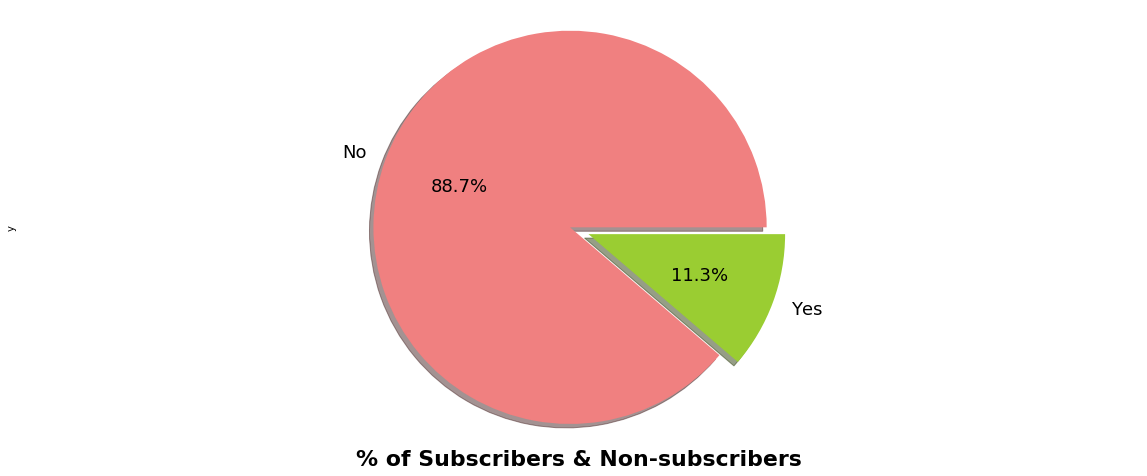

In [22]:


labels = 'No','Yes'
colors = [ 'lightcoral','yellowgreen']
explode = (0.1, 0)
 
ds['y'].value_counts().plot(kind='pie', figsize=(20,8),explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, fontsize=18);
plt.xlabel("% of Subscribers & Non-subscribers", fontweight='bold', fontsize=22);
plt.axis('equal');
plt.savefig('pie_y')

* The above pie chart shows the **imbalanced classes** clearly.

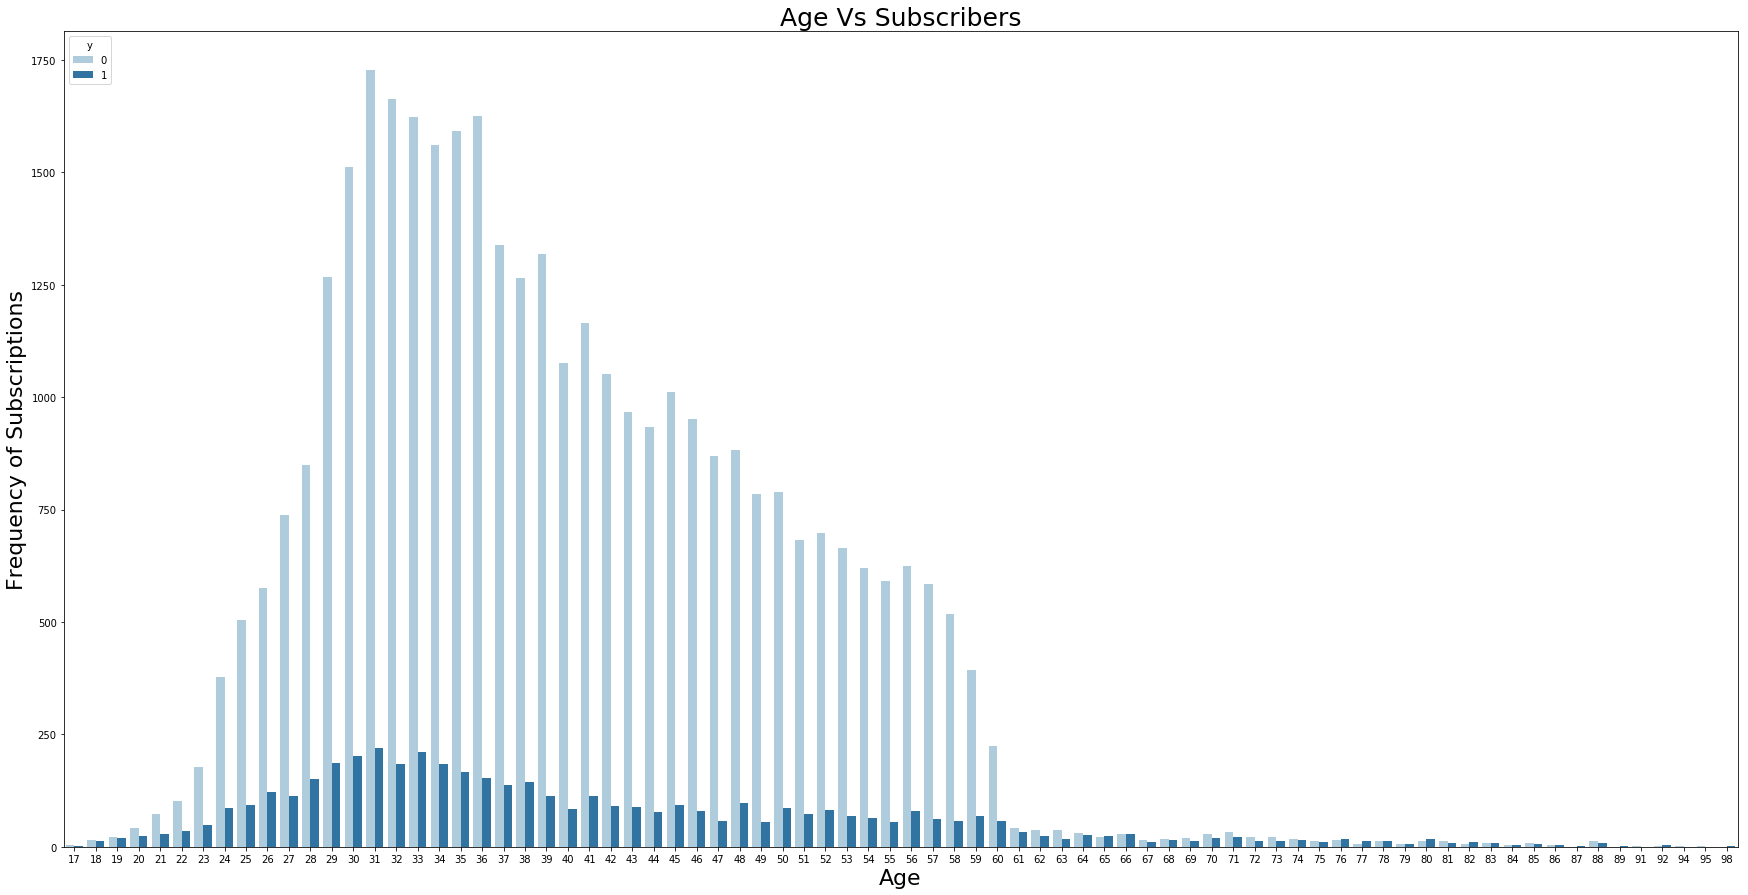

In [23]:
plt.figure(figsize=(30,15))
sns.countplot(ds['age'], hue = ds["y"], palette = "Paired");
plt.title('Age Vs Subscribers',fontsize=25)
plt.xlabel('Age',fontsize=22)
plt.ylabel('Frequency of Subscriptions',fontsize=22);
plt.savefig('age')



- The above diagram shows that most of the subscribers belong to the **23-60** age group which is normal since it's considered the working-age stage in most the world.
- In addition, the clients who are **younger than 23 years** usually can not afford the deposit
- On the other hand, the clients who are **older than 60 years** usually are not interested in purchasing a term deposit since they are in their retirement period and they try to enjoy their time and spend more money.

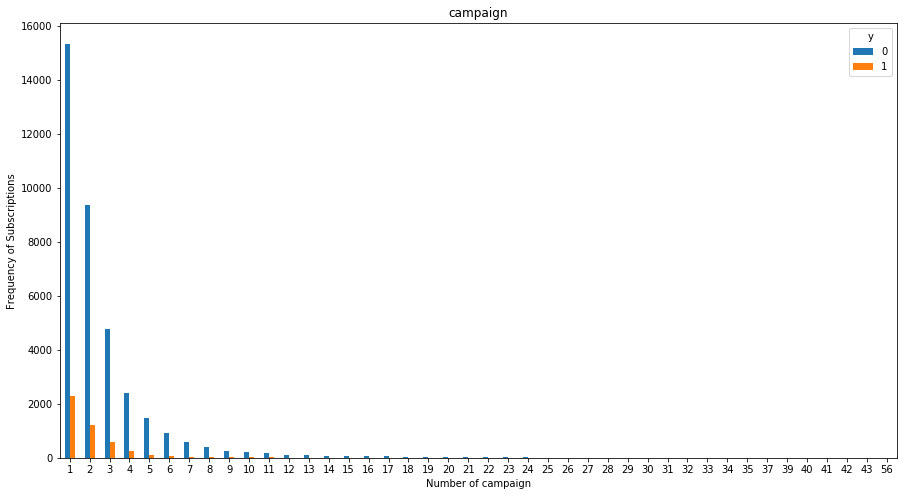

In [24]:
pd.crosstab(ds.campaign,ds.y).plot(kind='bar', figsize=(15, 8))
plt.xticks(rotation=0)
plt.title('campaign')
plt.xlabel('Number of campaign')
plt.ylabel('Frequency of Subscriptions');


* From the above diagram, we can observe that most of the clients who subscribed to the term-deposit made their decision clear in the few  first contacts
* Also, The greater the number of contacts the less the number of positive responses

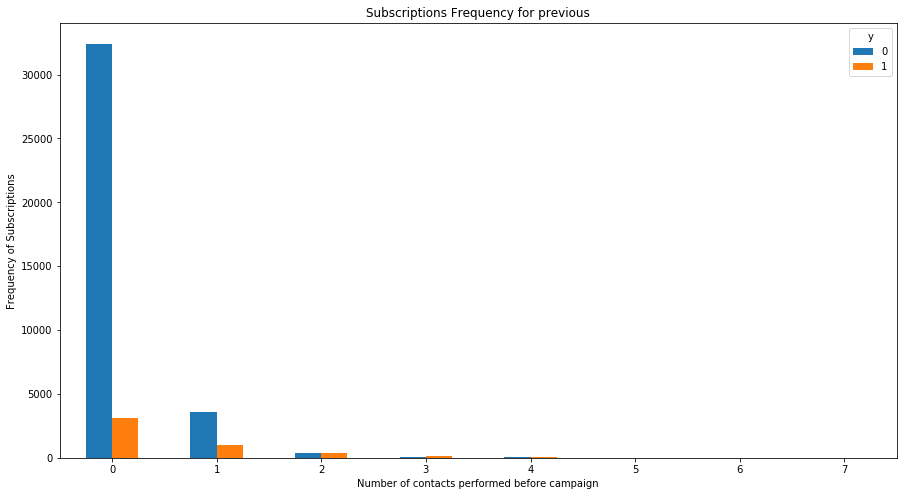

In [25]:

pd.crosstab(ds.previous,ds.y).plot(kind='bar',figsize=(15, 8))
plt.xticks(rotation=0)
plt.title('Subscriptions Frequency for previous')
plt.xlabel('Number of contacts performed before campaign')
plt.ylabel('Frequency of Subscriptions');



* The above diagram, prove our findings that it is more beneficial to target new customers instead of contacting the same customers more and more.


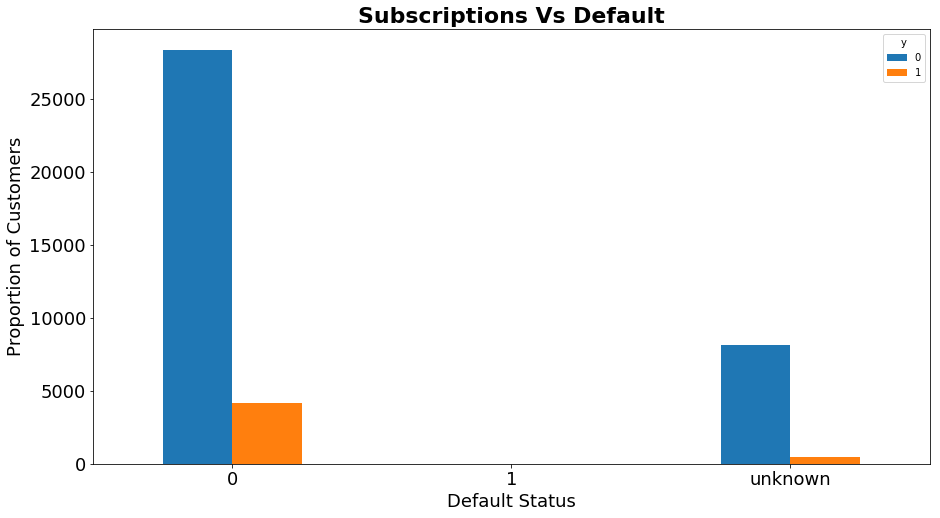

In [26]:
pd.crosstab(ds.default,ds.y).plot(kind='bar',figsize=(15, 8),fontsize=18)
plt.xticks(rotation=0)
plt.title('Subscriptions Vs Default', fontweight='bold', fontsize=22)
plt.xlabel('Default Status',fontsize=18)
plt.ylabel('Proportion of Customers',fontsize=18)
plt.savefig('Default')

**Default Attribute:** the clients who have defaulted on credit, have no chance to subscribe on a term deposit

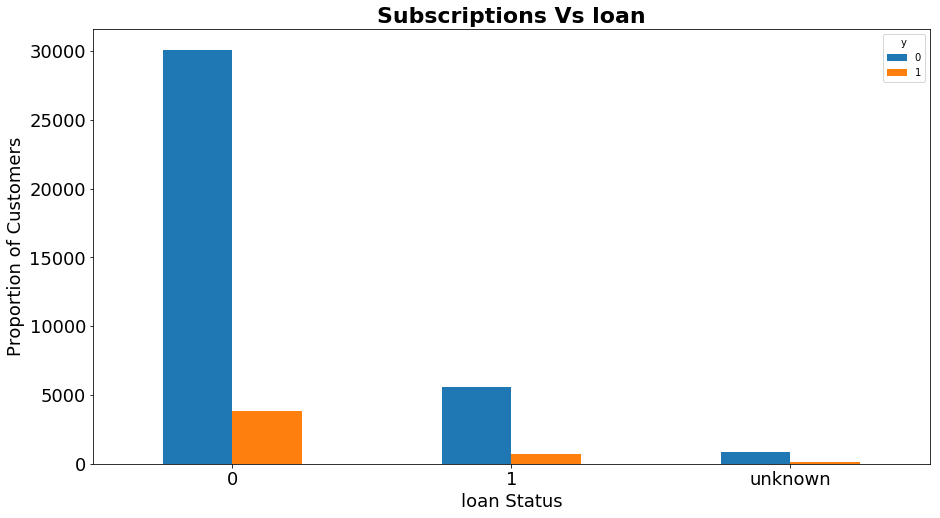

In [27]:
pd.crosstab(ds.loan,ds.y).plot(kind='bar',figsize=(15, 8),fontsize=18)
plt.xticks(rotation=0)
plt.title('Subscriptions Vs loan', fontweight='bold', fontsize=22)
plt.xlabel('loan Status',fontsize=18)
plt.ylabel('Proportion of Customers',fontsize=18)
plt.savefig('loan')

**Loan Attribute:** the people who do not have any financial obligations like loans tend more to subscribe on a term deposit.

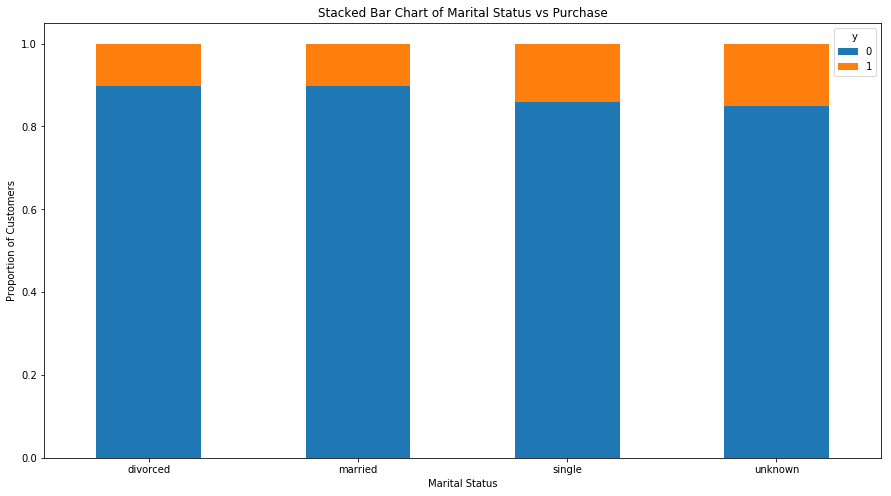

In [28]:
table=pd.crosstab(ds.marital,ds.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xticks(rotation=0)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers');

* The marital status does not seem a strong predictor for the outcome variable.

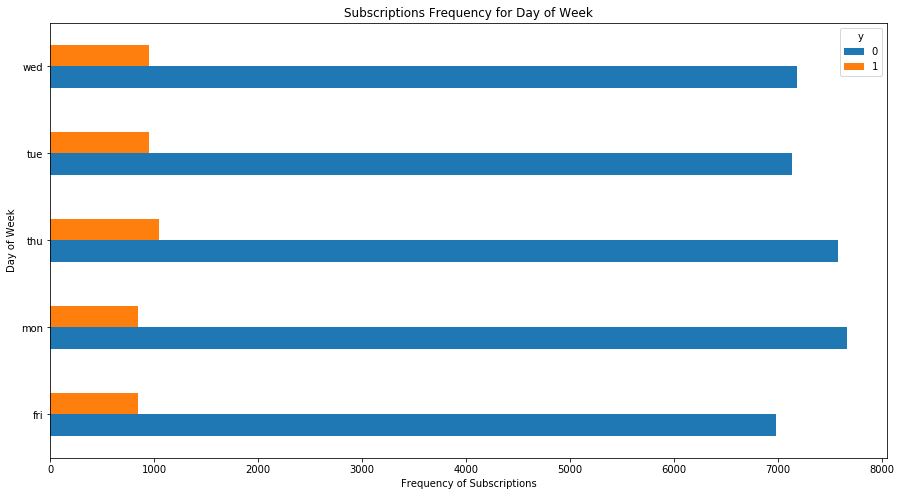

In [29]:
pd.crosstab(ds.day_of_week,ds.y).plot(kind='barh', figsize=(15, 8));
plt.title('Subscriptions Frequency for Day of Week')
plt.ylabel('Day of Week')
plt.xlabel('Frequency of Subscriptions');



* Day of the week may not be a good predictor of the outcome since all the weekdays has almost the same distribution.

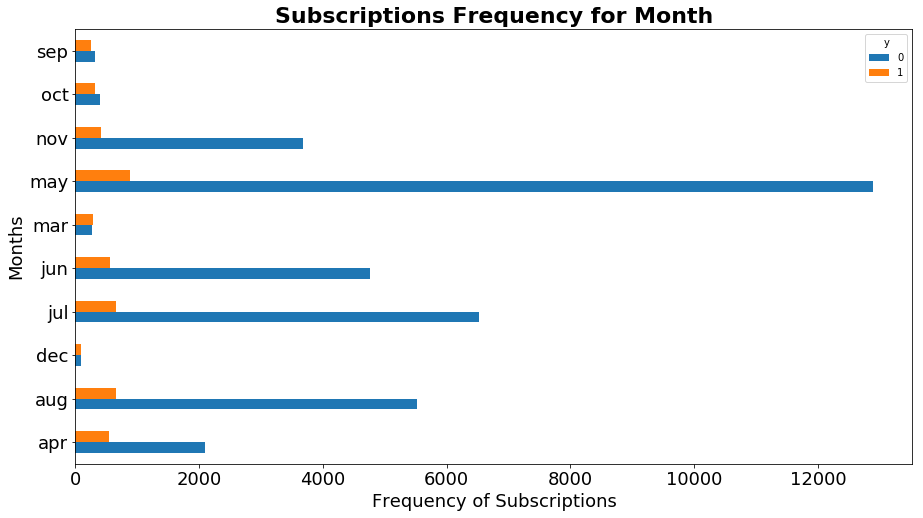

In [30]:
pd.crosstab(ds.month,ds.y).plot(kind='barh', figsize=(15, 8),fontsize=18);
plt.title('Subscriptions Frequency for Month', fontweight='bold', fontsize=22)
plt.ylabel('Months',fontsize=18)
plt.xlabel('Frequency of Subscriptions',fontsize=18);

plt.savefig('month')


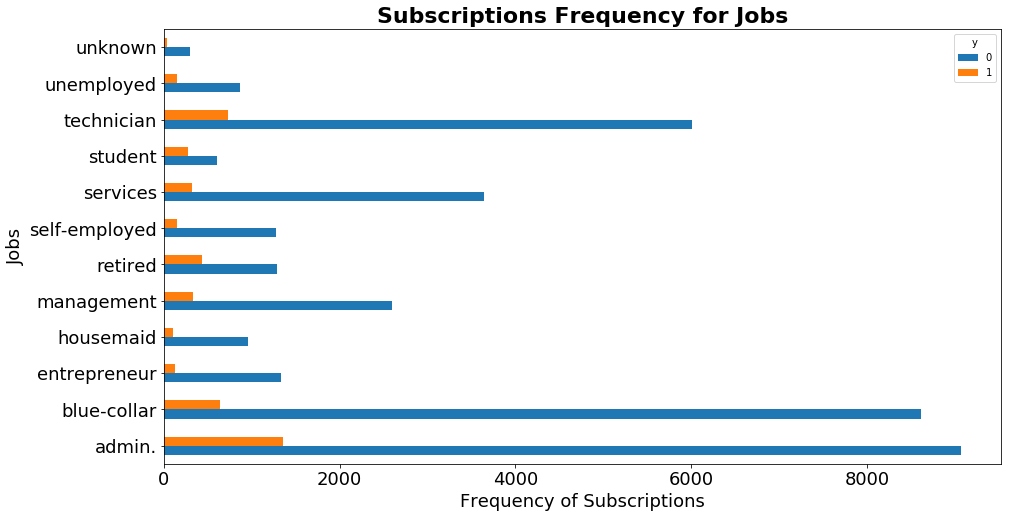

In [31]:
pd.crosstab(ds.job,ds.y).plot(kind='barh', figsize=(15, 8),fontsize=18);
plt.title('Subscriptions Frequency for Jobs', fontweight='bold', fontsize=22)
plt.ylabel('Jobs',fontsize=18)
plt.xlabel('Frequency of Subscriptions',fontsize=18);

plt.savefig('Jobs')

Text(0, 0.5, 'Frequency of Purchase')

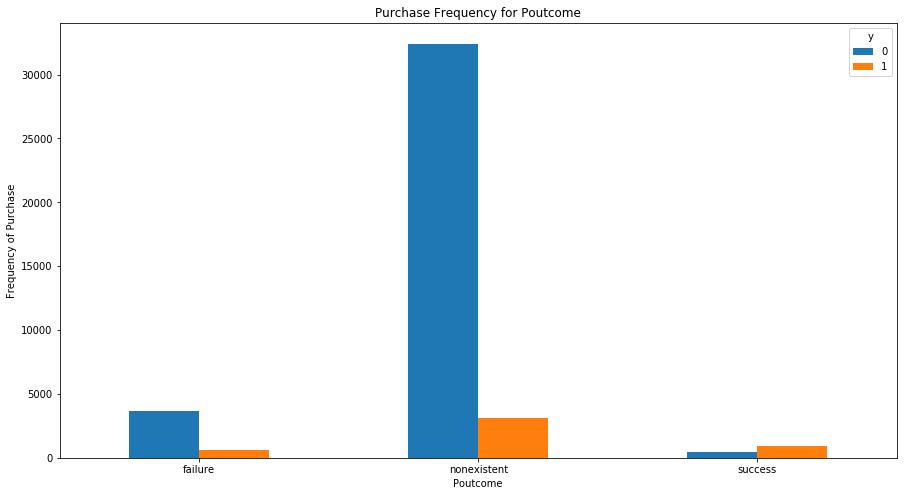

In [32]:
pd.crosstab(ds.poutcome,ds.y).plot(kind='bar',figsize=(15, 8))
plt.xticks(rotation=0)
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')



* The poutcome attribute seems to be a good predictor of our target.

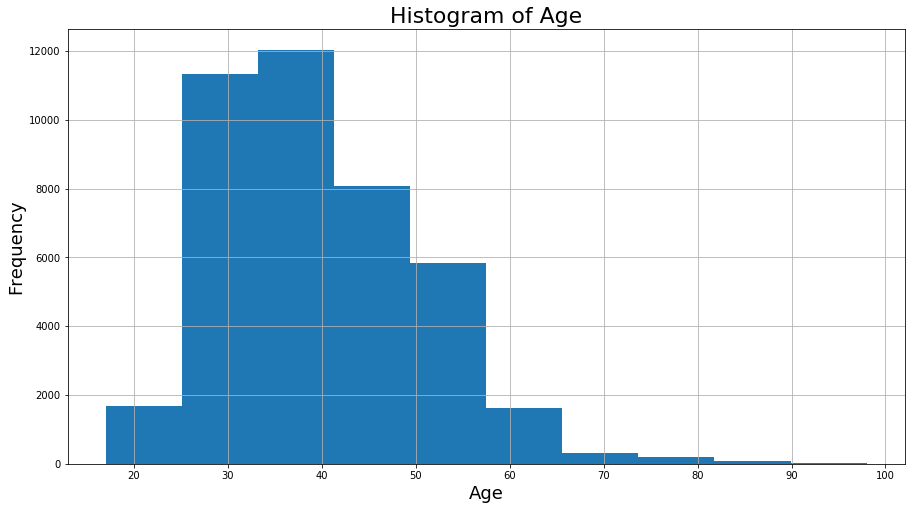

In [33]:
ds.age.hist(figsize=(15, 8))
plt.title('Histogram of Age',fontsize=22)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.savefig('hist_age')


- From the above histogram, we can observe two facts:
    * First, Most of the bank customers in this dataset are aged between **30–40 years**.
    * Second, the age attribute has some **outliers**.

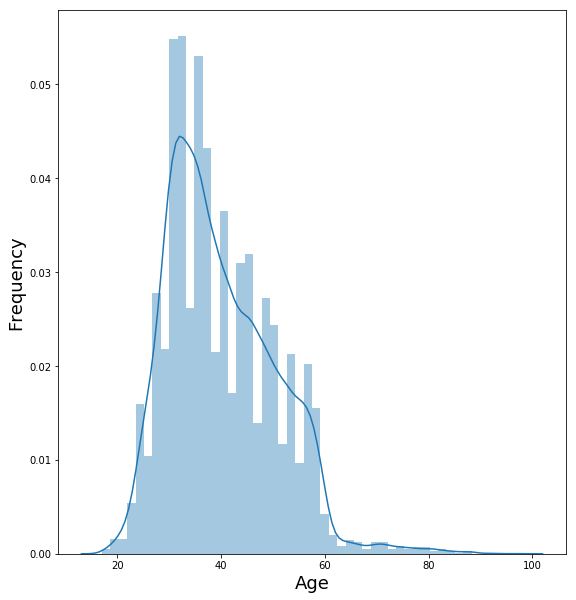

In [34]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
sns.distplot(ds['age']);
plt.xlabel('Age',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.savefig('hist_age2')


1.0245702631834515

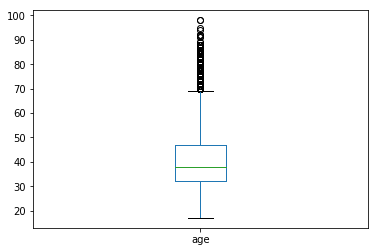

In [35]:
ds.age.plot(kind='box');
ds.age.plot(kind='box', showfliers=False);
ds[ds.age <= 70]['y'].value_counts(normalize=True).mul(100)
ds[ds.age > 70]['y'].value_counts(normalize=True).mul(100)
(len(ds[ds.age > 70]['y'])/ds.shape[0])*100

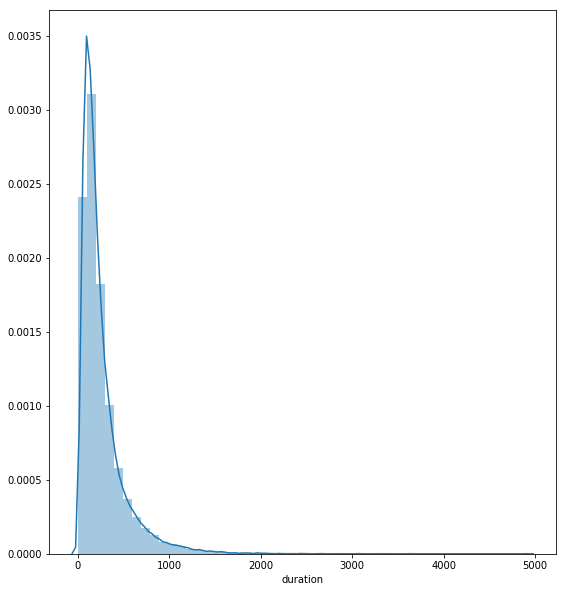

In [36]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
sns.distplot(ds['duration']);

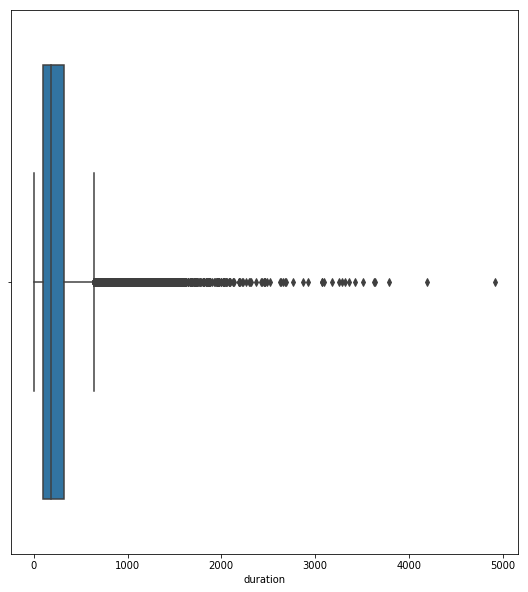

In [37]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
sns.boxplot(ds['duration']);

- Also, the duration attribute has some **outliers**.

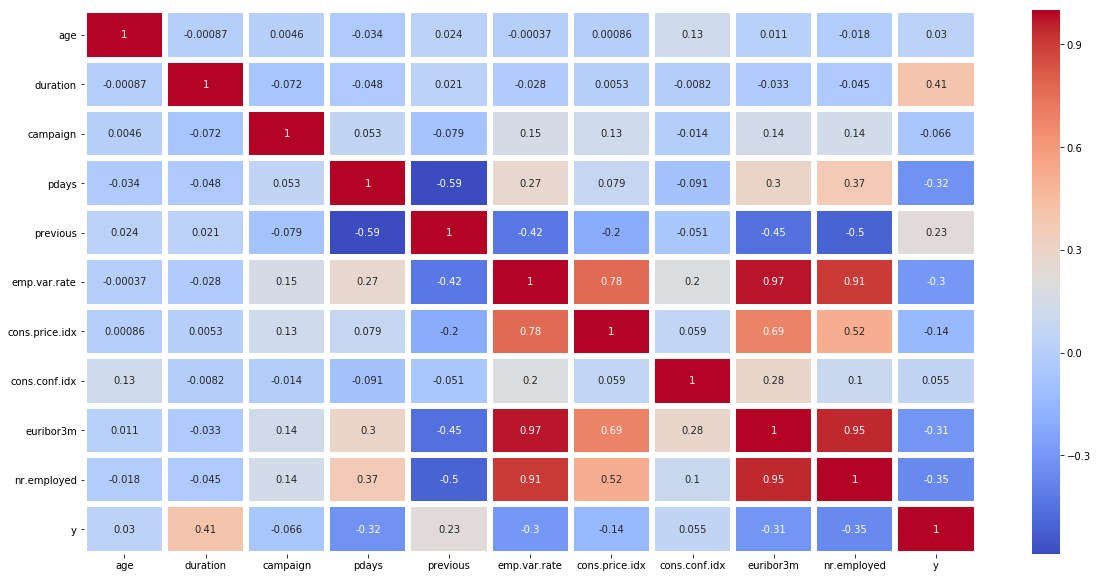

In [38]:
data_corr = ds.corr(method='pearson')
plt.figure(figsize=(20, 10))
sns.heatmap(data_corr, annot=True, linewidths = 5, cmap='coolwarm');

##### From the above Heatmap diagram, we can infer the following:
1. nr.employed is highly correlated to euribor3m
2. emp.var.rate is highly correlated to euribor3m
3. emp.var.rate  is highly correlated to nr.employed
4. Our target "y" positive correlation with previous and a negative correlation with nr.employed.
---

## Features Engineering

* Prepare The Data
* Select The Features


### Data Preparation & Cleansing
- **Drop columns**
    1. The **duration** of the call can only be known after the call has been performed, and usually after performing the call, the outcome is obviously known. Thus, the duration attribute should be drop; else, the predictive model will not be a realistic one.
    2. All of these attributes **('euribor3m', 'nr.employed', 'cons.price.idx')** have high correlation which could violate assumption for the log, so we need to drop them
    3. We need to drop **'pdays '** since most of the clients (about 96%) were not contacted previously, so it's useless
- **Missing Values**
    1.  For the **default** attribute, we will Infer the unknown values based on other attributes. Since there is a clear relation between default and our target (y), we will Infer the unknown values of the default based on our target (y).
    2. For **loan & housing** attributes, we will use the KNN log to fill the missing values since we could not find any clear relation between loan & housing and the other attributes
    3. For **job and education** attributes, we will create a separate category named other for all the missing values of the job and education attributes
    4. For marital attribute, we will drop the missing values since it only represents 0.19% of its values
- **Reduce Categorical Attributes**
    1. Reduce Categories of education and marital status
- **Outliers Values**
    1. Only two attributes contain outliers values which are age & duration. The duration will be dropped, and for the age outliers values, no need to treat them since it will not affect the model.



#### Drop columns

In [39]:
#for Log, remove correlation
ds = ds.drop('euribor3m', axis=1)
ds = ds.drop('pdays', axis=1) 
ds = ds.drop('cons.price.idx', axis=1)
ds = ds.drop('duration', axis=1)
ds = ds.drop('emp.var.rate', axis=1)




#### Missing Values

- Creating a separate category named other for all the missing values of the job and education attributes

In [40]:
ds[['job','education']] = ds[['job','education']].replace(['unknown'],'other')

In [41]:
#replace unknown values with null, so we can treat them
ds[['housing','loan','default']] = ds[['housing','loan','default']].replace("unknown", np.NaN)

- Infer the unknown values of the default attribute based on our Target attribute

In [42]:
# Infer the unknown values of the default attribute based on other attributes
#Here we use other independent variables to infer missing values.

ds.loc[(ds["y"]==1) & (pd.isna(ds["default"])), 'default'] = 0
ds.loc[(ds["y"]==0) & (pd.isna(ds["default"])), 'default'] = 1

- Use KNN log with 5 nearest rows which have a feature to fill in each missing value in loan and housing attributes

In [43]:
# Use 5 nearest rows which have a feature to fill in each row's
ds[['loan','housing']] = KNN(k=5).fit_transform(ds[['loan','housing']])

Imputing row 1/41188 with 0 missing, elapsed time: 301.744
Imputing row 101/41188 with 0 missing, elapsed time: 301.807
Imputing row 201/41188 with 0 missing, elapsed time: 301.808
Imputing row 301/41188 with 0 missing, elapsed time: 301.822
Imputing row 401/41188 with 0 missing, elapsed time: 301.829
Imputing row 501/41188 with 0 missing, elapsed time: 301.830
Imputing row 601/41188 with 0 missing, elapsed time: 301.830
Imputing row 701/41188 with 0 missing, elapsed time: 301.831
Imputing row 801/41188 with 0 missing, elapsed time: 301.832
Imputing row 901/41188 with 0 missing, elapsed time: 301.832
Imputing row 1001/41188 with 0 missing, elapsed time: 301.832
Imputing row 1101/41188 with 0 missing, elapsed time: 301.833
Imputing row 1201/41188 with 0 missing, elapsed time: 301.833
Imputing row 1301/41188 with 0 missing, elapsed time: 301.834
Imputing row 1401/41188 with 0 missing, elapsed time: 301.834
Imputing row 1501/41188 with 0 missing, elapsed time: 301.834
Imputing row 1601/41

[KNN] Warning: 1980/82376 still missing after imputation, replacing with 0


In [44]:
ds.drop(ds[ds["marital"]=="unknown"].index, axis=0, inplace=True)

In [45]:
#Check the Percentage of Unknown values in each columns:
for col in ds.columns:
    if ds[col].dtype == object:
        count_unknown=((ds[col]=='unknown').value_counts()/ds[col].count()*100)
        #count_unknown= ds[col].value_counts(normalize = True)
        print("\nCOLUMN:",col)
        print('The Percentage of Unknown:', count_unknown)


COLUMN: job
The Percentage of Unknown: False    100.0
Name: job, dtype: float64

COLUMN: marital
The Percentage of Unknown: False    100.0
Name: marital, dtype: float64

COLUMN: education
The Percentage of Unknown: False    100.0
Name: education, dtype: float64

COLUMN: contact
The Percentage of Unknown: False    100.0
Name: contact, dtype: float64

COLUMN: month
The Percentage of Unknown: False    100.0
Name: month, dtype: float64

COLUMN: day_of_week
The Percentage of Unknown: False    100.0
Name: day_of_week, dtype: float64

COLUMN: poutcome
The Percentage of Unknown: False    100.0
Name: poutcome, dtype: float64


#### Reduce Categorical Attributes

In [46]:
## For Marital Attribute, convert divorced values to be single
ds["marital"] = ds["marital"].replace({"divorced": "single"})

## For Education Attribute, group “basic.4y”,“basic.9y”,“basic.6y”, and call them “basic”.

ds['education'] = ds["education"].replace({"basic.9y": "basic"})
ds['education'] = ds["education"].replace({"basic.6y": "basic"})
ds['education'] = ds["education"].replace({"basic.4y": "basic"})

In [47]:
ds.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic,0.0,0.0,0.0,telephone,may,mon,1,0,nonexistent,-36.4,5191.0,0
1,57,services,married,high.school,1.0,0.0,0.0,telephone,may,mon,1,0,nonexistent,-36.4,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,0,nonexistent,-36.4,5191.0,0
3,40,admin.,married,basic,0.0,0.0,0.0,telephone,may,mon,1,0,nonexistent,-36.4,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,0,nonexistent,-36.4,5191.0,0


In [48]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41108 entries, 0 to 41187
Data columns (total 16 columns):
age              41108 non-null int64
job              41108 non-null object
marital          41108 non-null object
education        41108 non-null object
default          41108 non-null float64
housing          41108 non-null float64
loan             41108 non-null float64
contact          41108 non-null object
month            41108 non-null object
day_of_week      41108 non-null object
campaign         41108 non-null int64
previous         41108 non-null int64
poutcome         41108 non-null object
cons.conf.idx    41108 non-null float64
nr.employed      41108 non-null float64
y                41108 non-null int64
dtypes: float64(5), int64(4), object(7)
memory usage: 5.3+ MB


### Features Selection
- From the above Exploration, the selected features are as following:
    * age
    * campaign
    * previous
    * Job
    * Default
    * Loan
    * Month
    * poutcome


### Write The Dataset Into New CSV file

In [49]:
ds.to_csv('bankAfCls.csv', index=False,sep=';' )